## Task - 8 [Timeline Analysis : Covid-19]


### Objectives


1) Create a storyboard showing spread of Covid-19 cases in your country or any region (Asia, Europe, BRICS etc) using Tableau, Power BI or SAP.


2) Use animation, timeline and annotations to create attractive and interactive dashboards and story.


3) Identify interesting patterns and possible reasons helping Covid-19 spread with basic as well as advanced charts

In [2]:
!pip install folium

In [3]:
# Importing all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import pylab as pl
import seaborn as sns
%matplotlib inline

In [10]:
# Reading the Dataset
covid_data = pd.read_csv('C:\\Users\\Hrithvik\\Desktop\\The Sparks Foundation\\Datasets\\full_data.csv');
covid_data.head(59355)

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
59349,2020-11-25,Zimbabwe,90.0,1.0,9398.0,274.0,453.0,14.0,788.0,19.0
59350,2020-11-26,Zimbabwe,110.0,0.0,9508.0,274.0,527.0,13.0,841.0,19.0
59351,2020-11-27,Zimbabwe,115.0,0.0,9623.0,274.0,577.0,9.0,927.0,19.0
59352,2020-11-28,Zimbabwe,91.0,1.0,9714.0,275.0,594.0,10.0,949.0,18.0


In [11]:
covid_data.describe()

,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
count,59021.000000,59021.000000,5.605100e+04,4.641400e+04,5.822200e+04,58222.000000,5.671700e+04,56717.000000
mean,2110.111604,49.252978,1.862250e+05,7.278976e+03,1.455184e+04,341.875751,2.886393e+04,684.477088
std,19951.023265,411.828590,1.885282e+06,5.923431e+04,1.365011e+05,2779.184258,2.679244e+05,5499.683987
min,-8261.000000,-1918.000000,1.000000e+00,1.000000e+00,-3.864000e+03,-1625.000000,-9.050000e+02,-1616.000000
25%,0.000000,0.000000,1.900000e+02,1.400000e+01,7.000000e+00,0.000000,1.700000e+01,0.000000
50%,15.000000,0.000000,2.319000e+03,9.300000e+01,1.430000e+02,2.000000,3.140000e+02,4.000000
75%,256.000000,4.000000,2.583750e+04,8.020000e+02,1.888000e+03,31.000000,3.839000e+03,64.000000
max,679758.000000,12583.000000,6.227103e+07,1.453531e+06,4.182966e+06,71978.000000,8.302092e+06,139209.000000


In [12]:
# Checking the count on each values individually.
covid_data.nunique()

date                 335
location             215
new_cases           5801
new_deaths          1265
total_cases        24041
total_deaths        8181
weekly_cases       12186
weekly_deaths       2930
biweekly_cases     15165
biweekly_deaths     3827
dtype: int64

In [13]:
# Checking for count of null values for each column.
covid_data.isnull().sum()

date                   0
location               0
new_cases            333
new_deaths           333
total_cases         3303
total_deaths       12940
weekly_cases        1132
weekly_deaths       1132
biweekly_cases      2637
biweekly_deaths     2637
dtype: int64

In [18]:
# Continents in terms of occurence of covid cases on basis of iso_codes
covid_data.location.value_counts()[0:500]

Russia               335
Taiwan               335
United States        335
Switzerland          335
Georgia              335
                    ... 
International         71
Solomon Islands       45
Wallis and Futuna     44
Marshall Islands      32
Vanuatu               19
Name: location, Length: 215, dtype: int64

#### Analysis of Covid cases in India:

In [22]:
# Collecting India Data from the given dataset.
india_data = covid_data[covid_data['location'] =='India']
india_data = india_data[~india_data['new_cases'].isin(['World','International'])]
india_data.head(400)

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
24906,2019-12-31,India,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
24907,2020-01-01,India,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
24908,2020-01-02,India,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
24909,2020-01-03,India,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
24910,2020-01-04,India,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
25236,2020-11-25,India,44376.0,481.0,9222216.0,134699.0,309309.0,3706.0,586205.0,7128.0
25237,2020-11-26,India,44489.0,524.0,9266705.0,135223.0,308222.0,3645.0,582789.0,7102.0
25238,2020-11-27,India,43082.0,492.0,9309787.0,135715.0,305422.0,3553.0,580992.0,7047.0
25239,2020-11-28,India,41322.0,485.0,9351109.0,136200.0,300512.0,3474.0,577630.0,7012.0


In [24]:
top_10_india_deaths  = india_data.sort_values("total_deaths", ascending = False)
top_10_india_deaths.head(10)

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
25240,2020-11-29,India,41810.0,496.0,9392919.0,136696.0,297113.0,3469.0,578340.0,7061.0
25239,2020-11-28,India,41322.0,485.0,9351109.0,136200.0,300512.0,3474.0,577630.0,7012.0
25238,2020-11-27,India,43082.0,492.0,9309787.0,135715.0,305422.0,3553.0,580992.0,7047.0
25237,2020-11-26,India,44489.0,524.0,9266705.0,135223.0,308222.0,3645.0,582789.0,7102.0
25236,2020-11-25,India,44376.0,481.0,9222216.0,134699.0,309309.0,3706.0,586205.0,7128.0
25235,2020-11-24,India,37975.0,480.0,9177840.0,134218.0,303550.0,3699.0,586110.0,7159.0
25234,2020-11-23,India,44059.0,511.0,9139865.0,133738.0,294738.0,3668.0,586208.0,7127.0
25233,2020-11-22,India,45209.0,501.0,9095806.0,133227.0,281227.0,3592.0,588052.0,7106.0
25232,2020-11-21,India,46232.0,564.0,9050597.0,132726.0,277118.0,3538.0,588517.0,7164.0
25231,2020-11-20,India,45882.0,584.0,9004365.0,132162.0,275570.0,3494.0,592641.0,7177.0


Text(0.5, 1.0, 'Total deaths across india countries')

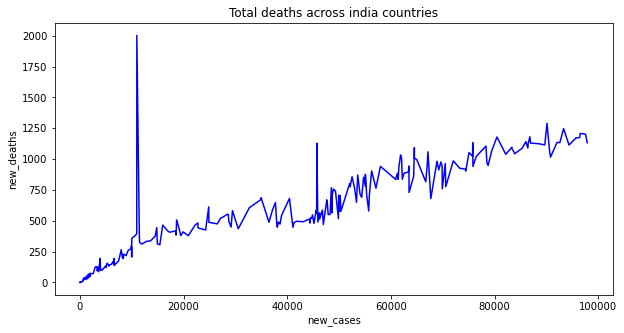

In [35]:
# Plotting the graph between new cases and deaths
plt.figure(figsize=(10,5))
sns.lineplot(x = 'new_cases',y = 'new_deaths',data = top_10_india_deaths[0:400], color='blue')
plt.title("Total deaths across india countries")

<AxesSubplot:xlabel='biweekly_deaths', ylabel='biweekly_cases'>

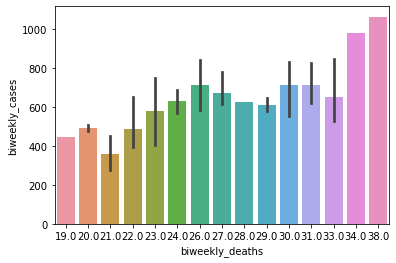

In [41]:
sns.barplot(x="biweekly_deaths", y="biweekly_cases", data=covid_data[260:300])

Text(0.5, 1.0, 'Total Cases vs Total Death Scenarios')

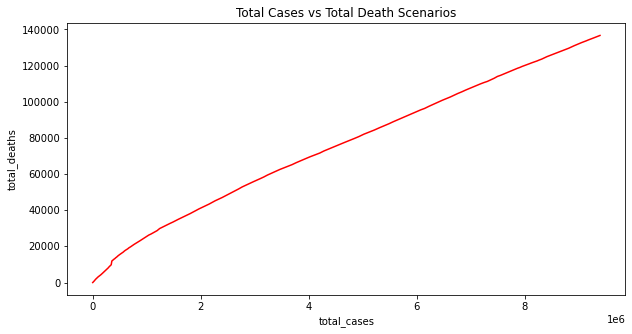

In [36]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_cases',y='total_deaths',data=india_data,color="red")
plt.title("Total Cases vs Total Death Scenarios")